## 导入数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv(r'C:\Users\m1533\Desktop\研一下\python\Data-analysis-master\sharebike\华盛顿共享单车\train.csv')
data_test = pd.read_csv(r'C:\Users\m1533\Desktop\研一下\python\Data-analysis-master\sharebike\华盛顿共享单车\test.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
data_test.info()# 可以看到每一个字段都没有缺失，info()用于数据框

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 特征工程

表中数据特征的实际意义如下：  
* datetime - hourly date + timestamp    
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
* holiday - whether the day is considered a holiday  
* workingday - whether the day is neither a weekend nor holiday  
* weather - 
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
* temp - temperature in Celsius  
* atemp - "feels like" temperature in Celsius  
* humidity - relative humidity  
* windspeed - wind speed  
* casual - number of non-registered user rentals initiated  
* registered - number of registered user rentals initiated  
* count - number of total rentals  

In [5]:
data_train['weather'].unique()#用于查看某一列有哪些取值

array([1, 2, 3, 4], dtype=int64)

### 特征分析
显然，season/holiday/workingday/weather是范围型数据，而其当前的格式为int。  
在后期进行数据可视化分析的时候，不够直观  
因此尝试对这些数据进行修改：

In [6]:
import pylab #画图，其中包括了matplotlib
import calendar #获取日历等
import seaborn as sns#画图的
from scipy import stats #包含贝叶斯方法和机器学习模型
from datetime import datetime#日期有关的时间，例如小时等
import matplotlib.pyplot as plt
import warnings # 非致命错误
warnings.filterwarnings('ignore',category=DeprecationWarning)
##添加中文标题须用下列代码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [7]:
df=data_train.append(data_test)# 纵向合并
df.reset_index(inplace=True)#顺序编号，不是按照原来的标号

In [8]:
df[['weather','season','holiday','workingday']].head()

,weather,season,holiday,workingday
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [9]:
df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [10]:
#将日期符号中的‘-’替换为‘/’,方便统一分析
df['datetime']=df['datetime'].map(lambda x:x.replace('-','/'))
#日期拆分成年月日
df['date']=df.datetime.apply(lambda x:x.split( )[0])#按照空格进行分割
#拆分时间为小时
df['hour']=df.datetime.apply(lambda x:x.split( )[1].split(':')[0])
#准确定义每天为周几
df['weekday']=df.date.apply(lambda x:calendar.day_name[datetime.strptime(x,"%Y/%m/%d").weekday()])
df.weekday.value_counts()
#转化月份数据为直观的月份的数据
df['month']=df.date.apply(lambda x:calendar.month_name[datetime.strptime(x,"%Y/%m/%d").month])
#替换季节的数据为直观的季节
df['season']=df.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
#替换代表气象数据的数字为实际意义
df['weather']=df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                              2: " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                              3: " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                              4: " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [11]:
df=df.drop(['datetime'],axis=1)
df.drop('index',inplace=True,axis=1)#inplace=True代表修改原数据，而不是生成一个新数据
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011/01/01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011/01/01,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011/01/01,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011/01/01,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011/01/01,04,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,Spring,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",10.66,12.880,60,11.0014,NaN,NaN,NaN,2012/12/31,19,Monday,December
17375,Spring,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",10.66,12.880,60,11.0014,NaN,NaN,NaN,2012/12/31,20,Monday,December
17376,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012/12/31,21,Monday,December
17377,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012/12/31,22,Monday,December


## 数据可视化
显然上一步得到的数据中无缺失值，  
下面我们分析通过分析查看一般性规律并剔除异常值

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

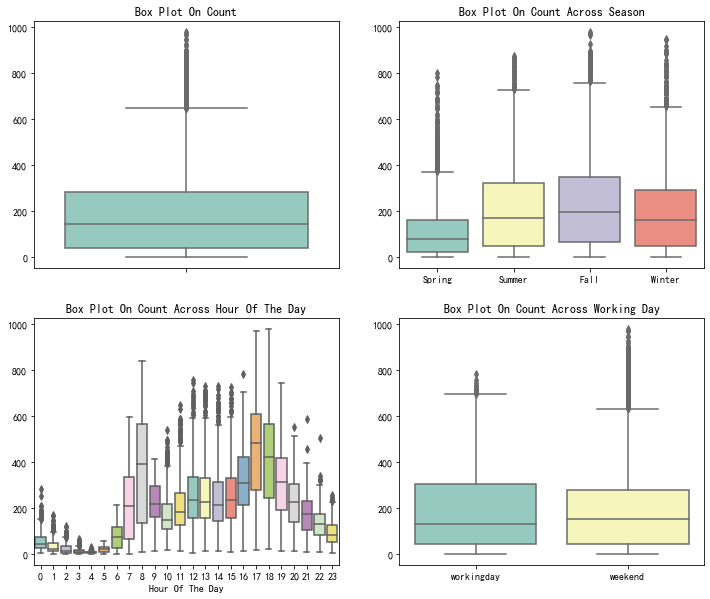

In [12]:
#用sns绘制图像
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)#可以直接改成fig, axes = plt.subplots(nrows=2,ncols=2，fig.size=(12,10))
sns.boxplot(data=df.loc[:10885],y="count",orient="v",ax=axes[0][0],palette="Set3")#orient="v"代表纵向表示，横向箱型图为"h"
sns.boxplot(data=df.loc[:10885],y="count",x="season",orient="v",ax=axes[0][1],palette="Set3")
ax1=sns.boxplot(data=df.loc[:10885],y="count",x="hour",orient="v",ax=axes[1][0],palette="Set3")
ax1.set_xticklabels(labels = list(range(0,24,1)))
ax=sns.boxplot(data=df.loc[:10885],y="count",x="workingday",orient="v",ax=axes[1][1],palette="Set3")
ax.set_xticklabels(labels = ['workingday','weekend'])

axes[0][0].set(ylabel='',title="Box Plot On Count")
axes[0][1].set(xlabel='', ylabel='',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='', ylabel='',title="Box Plot On Count Across Working Day")

In [13]:
#整理数量与日期的关系，便于绘图
data=[]
Levels = df.season.unique()
for season in Levels:
    data.append(df.iloc[0:10885].loc[df.season==season,'count'])

In [14]:
#整理数量count与时间的关系，便于绘图
h_data=[]
hour=df.hour.loc[0:10885].unique()
for each in hour:
    h_data.append(df.iloc[0:10885].loc[df.hour==each,'count'])

In [15]:
#整理数量与工作日的关系，便于绘图
working_data=[]
working=df['workingday'].loc[0:10885].unique()
for each in working:
    working_data.append(df.iloc[0:10885].loc[df.workingday==each,'count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20ddc9ec8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20ddc9ecf70>,
 'boxes': [<matplotlib.patches.PathPatch at 0x20ddc9ec550>,
 'medians': [<matplotlib.lines.Line2D at 0x20ddc9f3670>,
 'fliers': [<matplotlib.lines.Line2D at 0x20ddc9f39d0>,
 'means': []}

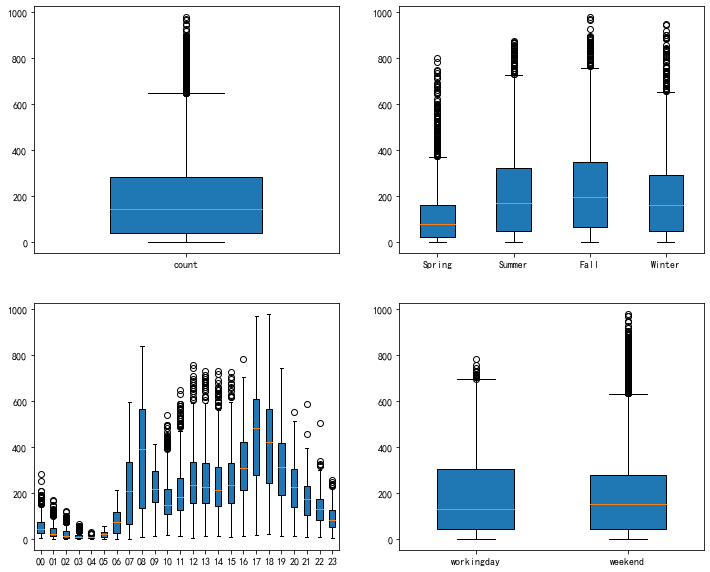

In [16]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12, 10)

axes[0,0].boxplot(df['count'][:10885],labels=['count'],widths=0.5,patch_artist=True)
axes[0,1].boxplot(data,labels=['Spring','Summer','Fall','Winter'],patch_artist=True)
axes[1,0].boxplot(h_data,labels=hour,patch_artist=True)
axes[1,1].boxplot(working_data,labels=['workingday','weekend'],patch_artist=True,widths=0.5)

In [17]:
#除去偏差较大的数据,考虑到
data_filtered=df.loc[:10885]
data_filtered=data_filtered[np.abs(df['count']-df['count'].mean())<=(3*df['count'].std())]

<ipython-input-17-b115fe6fedb5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered=data_filtered[np.abs(df['count']-df['count'].mean())<=(3*df['count'].std())]


In [18]:
data_filtered.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3.0,13.0,16.0,2011/01/01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8.0,32.0,40.0,2011/01/01,01,Saturday,January


In [19]:
data_filtered.shape

(10739, 15)

### 数据相关性分析

上面，我们通过对日期等时间数据进行了处理，划分了月，日，小时，工作日等特征
随后，分析一下temp，atemp，humidity，windspeed与count，casual，registered之间的相关性

In [20]:
cor=df.loc[:10885][['temp','atemp','humidity','windspeed','casual','registered','count']].corr()

In [21]:
mask=np.array(cor)
mask=np.triu(mask,k=1)
mask

array([[ 0.        ,  0.98494811, -0.06494877, -0.01785201,  0.46709706,
         0.31857128,  0.39445364],
       [ 0.        ,  0.        , -0.04353571, -0.057473  ,  0.46206654,
         0.31463539,  0.38978444],
       [ 0.        ,  0.        ,  0.        , -0.31860699, -0.3481869 ,
        -0.26545787, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09227619,
         0.09105166,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.49724969,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

<AxesSubplot:>

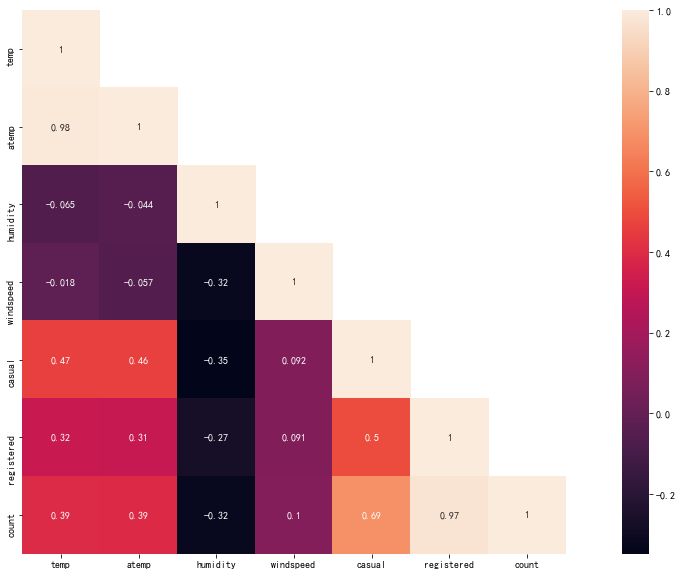

In [22]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(cor,mask=mask,vmax=1,square=True,annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

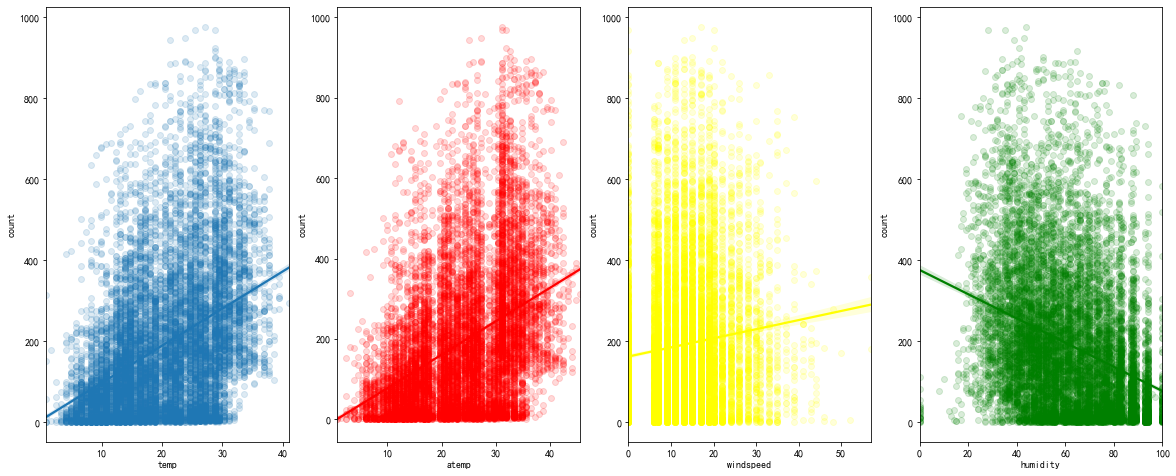

In [23]:
fig,ax=plt.subplots(1,4,figsize=(20,8))
sns.regplot(x='temp',y='count',data=df.loc[:10885],ax=ax[0],scatter_kws={'alpha':0.15})
sns.regplot(x='atemp',y='count',data=df.loc[:10885],ax=ax[1],color='red',scatter_kws={'alpha':0.15})
sns.regplot(x='windspeed',y='count',data=df.loc[:10885],ax=ax[2],color='yellow',scatter_kws={'alpha':0.15})
sns.regplot(x='humidity',y='count',data=df.loc[:10885],ax=ax[3],color='green',scatter_kws={'alpha':0.15})

* 特征之间没有明显的关联性，对数量的贡献除了相关的会员数量与非会员数量外，天气与环境对租车数量的关联性都不是很明显。
* “atemp”在预测过程中不会被考虑，因其与”temp”有很强的相关性。在模型建立的过程中，两者必须删除一个，它们在数据中表现多重共线性。是非独立的变量
* 同样，”casual”和”registered”也不会在模型中考虑，对于”count”来说，他们是多余的。

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.        , 0.        , 0.        , ..., 6.87523209, 6.87729607,
         6.88448665])),
 (1.4251967988522145, 4.552561095177975, 0.9568495659313458))

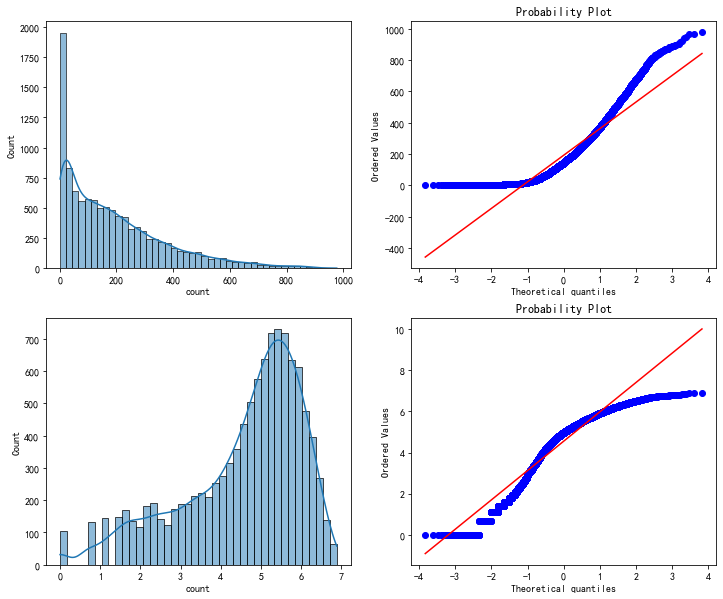

In [24]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
sns.histplot(df.loc[:10885]['count'],ax=ax[0][0],kde = True)
stats.probplot(df.loc[:10885]['count'],dist='norm',fit=True,plot=ax[0][1])
sns.histplot(np.log(df.loc[:10885]['count']),ax=ax[1][0],kde = True)
stats.probplot(np.log(df.loc[:10885]['count']),dist='norm',fit=True,plot=ax[1][1])

In [25]:
#由于数据量大于5000所以我们采用KS检验而不是Shapiro_test
#正态性检验
KS_Test1 = stats.kstest(df.loc[:10885]['count'], cdf='norm')
print(KS_Test1)
#Shapiro_test = stats.shapiro(Profit_data.Profit)
#print(Shapiro_test)

KstestResult(statistic=0.9768790198445412, pvalue=0.0)


p值小于0.05，拒绝原假设，说明不服从正态分布，所以要对数据做修改

### 可视化月份，季节，小时，星期、用户类型与数量的关系

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User type'),
 None]

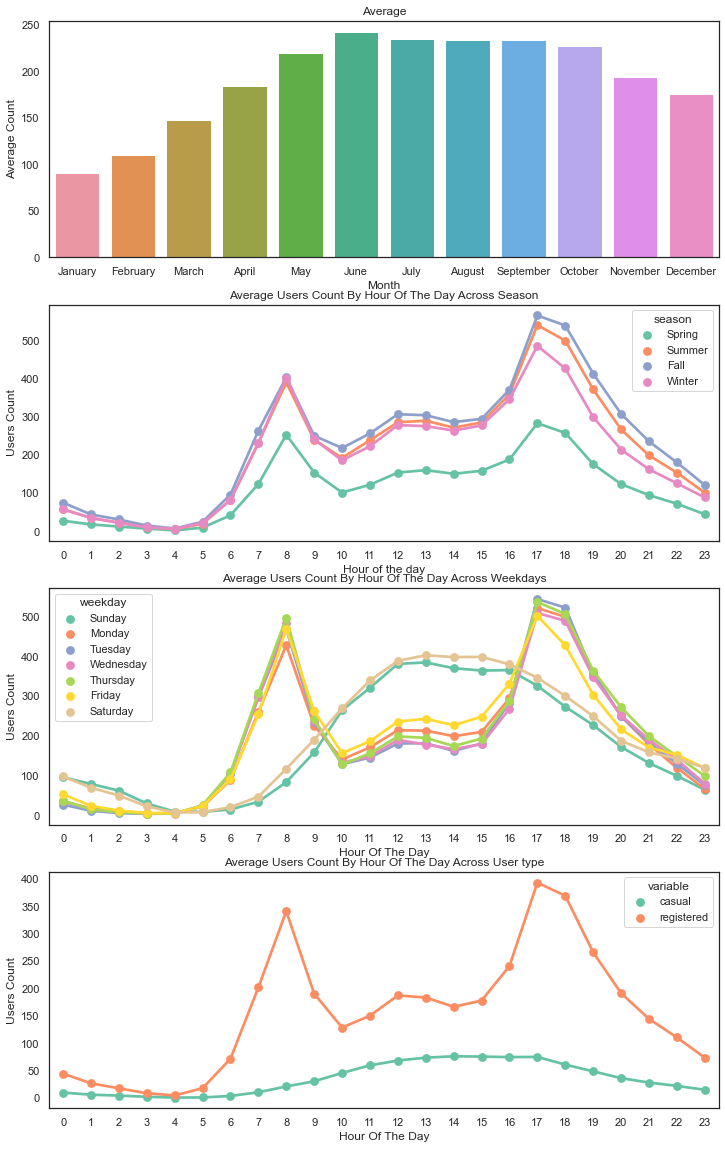

In [26]:
#首先将时间重新转化成整型数据，方便后面对时间进行排序
df.hour=df.hour.astype(int)
sns.set_theme(style="white",palette="Set2")
fig,ax=plt.subplots(4,1,figsize=(12,20))

month = ["January","February","March","April","May","June","July","August","September","October","November","December"]
week = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated=pd.DataFrame(df.loc[:10885].groupby('month')['count'].mean()).reset_index()
sns.barplot(data=monthAggregated,x='month',y='count',ax=ax[0],order=month)
ax[0].set(xlabel='Month',ylabel='Average Count',title='Average')

seasonaggregated= pd.DataFrame(df.loc[:10885].groupby(['season','hour'])['count'].mean()).reset_index()
sns.pointplot(data=seasonaggregated, x=seasonaggregated['hour'],y=seasonaggregated['count'],hue = seasonaggregated['season'],
              ax=ax[1],join=True,hue_order=['Spring','Summer','Fall','Winter'])
ax[1].set(xlabel='Hour of the day',ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season")

hourAggregated=pd.DataFrame(df.loc[:10885].groupby(["hour","weekday"])["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated['hour'],y=hourAggregated['count'],
              hue=hourAggregated['weekday'],hue_order=week,
              data=hourAggregated,join=True,ax=ax[2])
ax[2].set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed=pd.melt(df.loc[:10885][['hour','casual','registered']],id_vars=['hour'],value_vars=['casual','registered'])
hourAggregated=pd.DataFrame(hourTransformed.groupby(['hour','variable'],sort=True)['value'].mean()).reset_index().sort_values(by='hour')
sns.pointplot(x=hourAggregated['hour'],y=hourAggregated['value'],hue=hourAggregated['variable'],
              hue_order=['casual','registered'],data=hourAggregated,join=True)
ax[3].set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User type",label='big')

Text(0.5, 1.0, 'user count compare between casual and registered users')

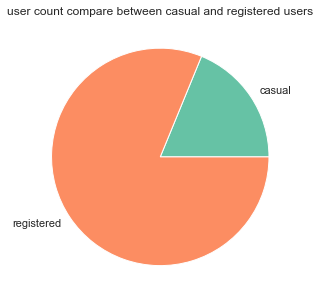

In [27]:
sns.set_theme(palette='Set2')
fig=plt.subplots(figsize=(5,5))
casual=df.loc[:10885,'casual'].sum()
registered=df.loc[:10885,'registered'].sum()
plt.pie([casual,registered],labels=['casual','registered'])
#plt.grid(True)
#plt.xlabel('user type')
#plt.ylabel('user count')
plt.title('user count compare between casual and registered users')

* 春秋用车数量明显高于冬夏，其中，6-10月租车数量较高，1-3月租车数量最少
* 在一天之中，早高峰7-9点以及晚高峰16-19点时用车量较多
* 在工作日时，用车量呈现出双峰趋势，分别在早晚高峰时出现峰值，但是在9-16点用车量较少；但是在节假日，9-19点用车量较大
* 注册用户的用车趋势大致与工作日曲线一致，这说明大部分注册用户将共享单车作为上班通勤中的交通工具之一，而非注册用户可能主要用于娱乐等其他方面的需求

## 修正windspeed数据

通过对数据进行观察发现，尽管数据完整，但在风速数据中，为0的数据超过1300个
显然，这部分数据信息有误，因此有必要根据已有的信息进行分析

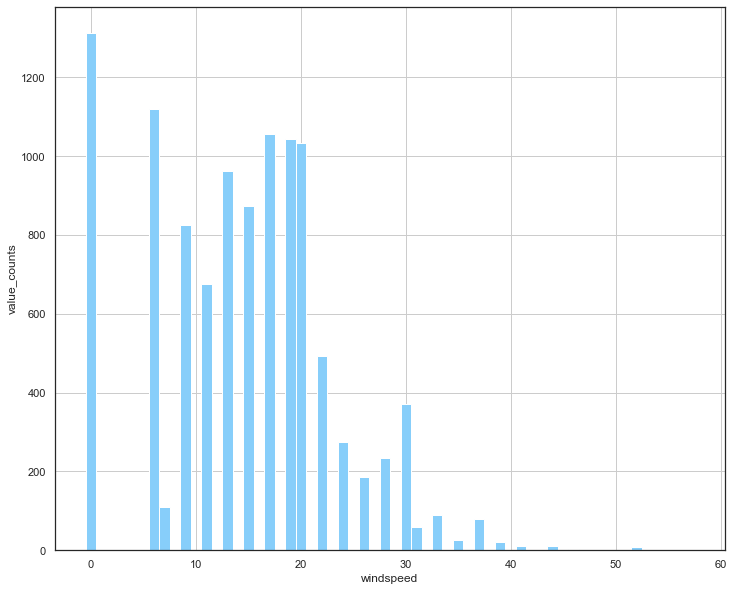

In [28]:
windspeed=df.loc[:10885].windspeed
sns.set_theme(style="white",palette="Set2")
fig,ax=plt.subplots(1,figsize=(12,10))
plt.bar(windspeed.unique(),windspeed.value_counts(),width=1,color="#87CEFA")
plt.xlabel('windspeed')
plt.ylabel('value_counts')
plt.grid(True)

显然，风速的结果与season，weather，humidity，month，temp，year，atemp有关。
而这其中的season，weather，month，year已经在之前处理过，  
为进行预测，有必要将数据重新转化为数值型数据

In [29]:
data_train = pd.read_csv(r'C:\Users\m1533\Desktop\研一下\python\Data-analysis-master\sharebike\华盛顿共享单车\train.csv')
data_test = pd.read_csv(r'C:\Users\m1533\Desktop\研一下\python\Data-analysis-master\sharebike\华盛顿共享单车\test.csv')
submmit_datetime = data_test['datetime'].copy().astype(str)
data_test.datetime=data_test.datetime.map(lambda x:x.replace('-','/'))
data_train.datetime=data_train.datetime.map(lambda x:x.replace('-','/'))

In [30]:
data = data_train.append(data_test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("/")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y/%m/%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y/%m/%d").month)

#dailyData["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y/%m/%d").weekday()])
#dailyData["month"] = data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y/%m/%d").month])

In [31]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

<ipython-input-31-67b24ebf63c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWind0["windspeed"] = wind0Values


## 回归预测

In [32]:
## 定义RMSLE
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

### 线性回归

In [33]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [34]:
data_train = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
data_test = data[~pd.notnull(data['count'])].sort_values(by=["datetime"]) #~符号代表的是补集的意思
yLabels = data_train["count"]
yLablesRegistered = data_train["registered"]
yLablesCasual = data_train["casual"]
data_train  = data_train.drop(['casual',"count","registered","atemp","date","datetime"],axis=1)
data_test  = data_test.drop(["atemp","date","datetime",'casual',"count","registered"],axis=1)

In [35]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [36]:
model= LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
ylabelslog = np.log1p(yLabels)
data_train1=np.array(data_train,dtype=float)
ylabelslog1=np.array(ylabelslog,dtype=float)
data_test1=np.array(data_test,dtype=float)
model.fit(data_train1,ylabelslog1)
LR_preds = model.predict(data_test1)

In [37]:
submission = pd.DataFrame({
    "datetime": submmit_datetime, 
    "count": np.exp(LR_preds)
})
submission.to_csv('LR_submission.csv', index=False)

In [38]:
preds = model.predict(X= data_train1)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(ylabelslog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.9792780116239262


### Ridge 

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9792779969762331


[Text(0.5, 0, 'Alpha'),
 Text(0, 0.5, 'RMSLE'),
 Text(0.5, 1.0, 'Change of RMSLE over Alpha on Ridge'),
 None]

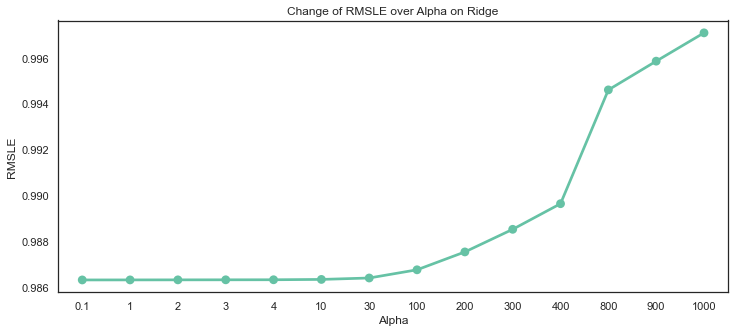

In [40]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_,ridge_params_,scoring = rmsle_scorer,cv=5)
data_train1=np.array(data_train,dtype=float)
ylabelslog1=np.array(ylabelslog,dtype=float)# sklearn 需要先将输入转变成为浮点数
grid_ridge_m.fit( data_train1, ylabelslog1 )
preds = grid_ridge_m.predict(X= data_train1)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(ylabelslog1),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sns.set_theme(style="white",palette="Set2")
a=sns.pointplot(data=df,x="param_alpha",y="rmsle",ax=ax)
a.set(xlabel='Alpha', ylabel='RMSLE',title="Change of RMSLE over Alpha on Ridge",label='big')
#alpha取0.1时结果最好，但是误差仍然接近一所以该模型效果不好

In [41]:
#输出结果
Rd_model = Ridge(alpha=1000)
Rd_model.fit(data_train1, ylabelslog1)
Rd_preds = Rd_model.predict(X=data_test1)
submission = pd.DataFrame({
    "datetime": submmit_datetime, 
    "count": np.exp(Rd_preds)
})
submission.to_csv('Rd_submission.csv', index=False)

### Lasso

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9793947700208211


[Text(0, 0, '0.001'),
 Text(1, 0, '0.0011'),
 Text(2, 0, '0.0012'),
 Text(3, 0, '0.0025'),
 Text(4, 0, '0.0033'),
 Text(5, 0, '0.005'),
 Text(6, 0, '0.01'),
 Text(7, 0, '0.0333'),
 Text(8, 0, '0.1'),
 Text(9, 0, '0.25'),
 Text(10, 0, '0.3333'),
 Text(11, 0, '0.5'),
 Text(12, 0, '1.0'),
 Text(13, 0, '10.0')]

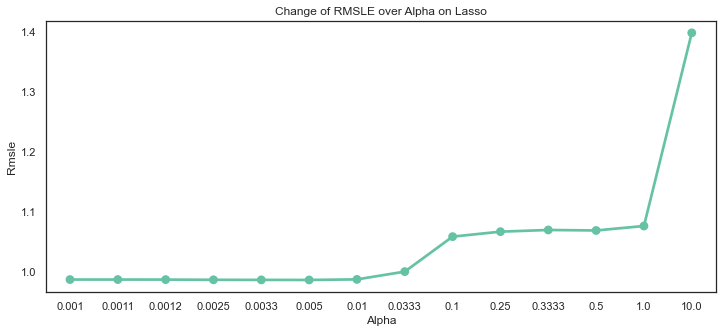

In [42]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
grid_lasso_m.fit( data_train1, ylabelslog1 )
preds = grid_lasso_m.predict(X= data_train1)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(ylabelslog1),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sns.set_theme(style="white",palette = "Set2")
b=sns.pointplot(data=df,x="param_alpha",y="rmsle",ax=ax)
b.set(xlabel="Alpha",ylabel="Rmsle",title="Change of RMSLE over Alpha on Lasso")
b.set_xticklabels(labels = np.round(alpha,4)[::-1])

In [43]:
##结果得到alpha取0.005时结果最好
Ls_model = Lasso(alpha=0.005)
Ls_model.fit(data_train1, ylabelslog1)
Ls_preds = Ls_model.predict(X=data_test1)
submission = pd.DataFrame({
    "datetime": submmit_datetime, 
    "count": np.exp(Ls_preds)
})
submission.to_csv('Ls_submission.csv', index=False)

### 随机森林

In [44]:
from sklearn.ensemble import RandomForestRegressor
Rf_model=RandomForestRegressor(n_estimators=100)
Rf_model.fit(data_train1,ylabelslog1)
preds=Rf_model.predict(data_train1)
rmsle(np.exp(ylabelslog1),np.exp(preds),False)
Rf_preds=Rf_model.predict(data_test1)
submission = pd.DataFrame({
    "datetime": submmit_datetime, 
    "count": np.exp(Rf_preds)
})
submission.to_csv('Rf_submission.csv', index=False)

### GB

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators= 4000,alpha=0.01);
gb.fit(data_train1,ylabelslog1)
gb_preds=gb.predict(data_test1)
submission = pd.DataFrame({
    "datetime": submmit_datetime, 
    "count": np.exp(gb_preds)
})
submission.to_csv('GB_submission.csv', index=False)

### Xgboost

In [46]:
import xgboost as xg

def grid_search():
    xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4)
    xgr.fit(data_train1, ylabelslog1)
    parameters=[{'subsample':[i/10.0 for i in range(6,10)],
                 'colsample_bytree':[i/10.0 for i in range(6,10)]}]
    grid_search= GridSearchCV(estimator=xgr, param_grid=parameters, cv=10,n_jobs=-1)
    grid_search=grid_search.fit(data_train1, ylabelslog1)
    best_accuracy=grid_search.best_score_
    best_parameters=grid_search.best_params_
    return best_accuracy, best_parameters

In [47]:
best_accuracy, best_parameters = grid_search()
best_accuracy
best_parameters

{'colsample_bytree': 0.7, 'subsample': 0.9}

In [48]:
xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.8,subsample=0.9)
xgr.fit(data_train1, ylabelslog1)
preds = xgr.predict(data_train1)
rmsle(np.exp(ylabelslog1),np.exp(preds),False)
xg_preds = xgr.predict(data_test1)
np.exp(Rf_preds).mean()
submission = pd.DataFrame({
    "datetime": submmit_datetime, 
    "count": np.exp(xg_preds)
})
submission.to_csv('xg_submission.csv', index=False,encoding='utf-8',date_format='%Y/%m/%d %H%M%S')